In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from math import sqrt

%matplotlib inline

In [ ]:
!gdown --id 1W8vwqRFeMq6yBvLK4KYWPbcg3cAk2ryh
!unzip SolData.zip

Downloading...
From: https://drive.google.com/uc?id=1W8vwqRFeMq6yBvLK4KYWPbcg3cAk2ryh
To: /content/SolData.zip
100% 187k/187k [00:00<00:00, 57.0MB/s]
Archive:  SolData.zip
replace solTrainY.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: solTrainY.csv           
replace __MACOSX/._solTrainY.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: __MACOSX/._solTrainY.csv  
  inflating: solTrainX.csv           
  inflating: __MACOSX/._solTrainX.csv  
  inflating: solTestX.csv            
  inflating: __MACOSX/._solTestX.csv  
  inflating: solTrainXtrans.csv      
  inflating: __MACOSX/._solTrainXtrans.csv  
  inflating: solTestY.csv            
  inflating: __MACOSX/._solTestY.csv  
  inflating: solTestXtrans.csv       
  inflating: __MACOSX/._solTestXtrans.csv  


In [ ]:
trainX = pd.read_csv('solTrainXtrans.csv', index_col=0)
trainY = pd.read_csv('solTrainY.csv', index_col=0)
trainX.shape, trainY.shape

((951, 228), (951, 1))

In [ ]:
testX = pd.read_csv('solTestXtrans.csv', index_col=0)
testY = pd.read_csv('solTestY.csv', index_col=0)
testX.shape, testY.shape

((316, 228), (316, 1))

# Tensorflow installation

```sh
pip install --upgrade pip
pip install tensorflow
```  
Details: https://www.tensorflow.org/install

Already installed in the Colaboratory.

# Keras models

In [ ]:
import numpy
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import multiprocessing
from tensorflow.keras.optimizers import Adam

In [ ]:
num_features = trainX.shape[1]

In [ ]:
layers = [
  Input(shape=(num_features, ), dtype='float32'),
  Dense(500, activation='sigmoid'),
  Dense(1, activation='linear')
]

model = Sequential(layers)

In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [ ]:
history = model.fit(trainX, trainY, epochs=128, batch_size=32, validation_split=0.3, verbose=0)

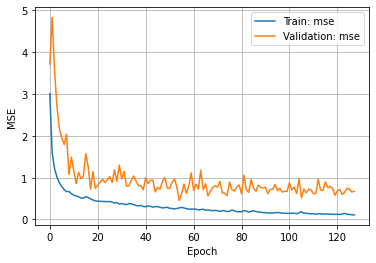

In [ ]:
import matplotlib.pyplot as plt

metrics = history.history

plt.plot(metrics['mse'], label='Train: mse')
plt.plot(metrics['val_mse'], label='Validation: mse')
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

In [ ]:
predictY = model.predict(testX)

rmse = sqrt(mean_squared_error(testY['x'].values, predictY))
coefficient_of_dermination = r2_score(testY['x'].values, predictY)
print ("RMSE: ", rmse, "R^2: ", coefficient_of_dermination)

RMSE:  0.7305900124831156 R^2:  0.8760531245823049


Text(0, 0.5, 'Real Y')

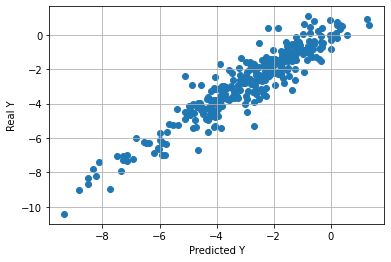

In [ ]:
plt.scatter(predictY, testY['x'])
plt.grid()
plt.xlabel('Predicted Y')
plt.ylabel('Real Y')

# Model Tuning

In [ ]:
def create_model(learning_rate=0.001):
    model = Sequential()
    model.add(Input(shape=(num_features, ), dtype='float32'))
    model.add(Dense(500, input_dim=num_features, activation='relu'))
    model.add(Dense(1, kernel_initializer='normal',activation='linear'))
    # Compile model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])
    return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# create model
model = KerasRegressor(build_fn=create_model, verbose=0)

# define the grid search parameters
grid = {
    "batch_size": [64, 128],
    "epochs": [32, 64],
    "learning_rate": [1e-3, 1e-4]
}

grid = GridSearchCV(
    estimator=model, 
    param_grid=grid,
    scoring='neg_mean_squared_error',
    cv=2, 
    refit=True,
    verbose=True
)

In [ ]:
grid_result = grid.fit(trainX, trainY)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   32.5s finished


In [ ]:
# summarize results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

predictY = grid_result.best_estimator_.predict(testX)

rmse = sqrt(mean_squared_error(testY['x'].values, predictY))
coefficient_of_dermination = r2_score(testY['x'].values, predictY)

print ("RMSE: ", rmse, "R^2: ", coefficient_of_dermination)

Best: -2.962698129333262 using {'batch_size': 64, 'epochs': 64, 'learning_rate': 0.001}
RMSE:  0.6503371328653001 R^2:  0.9017878484517909
